<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg6/Cluster_Iris_Flower_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h5>Nama : Tassya Ramadhanti</h5>
<h5>NIM  : 1103204016</h5>
<h5>"Clustering for Data Segmentation Using Iris Flower DataSet"</h5>

In [2]:
!pip install kaggle

In [3]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"3182cbc2ed662c2e7a9035299a970b54"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [30]:
!kaggle datasets list -s "Iris Flower Dataset"

ref                                                          title                                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arshid/iris-flower-dataset                                   Iris Flower Dataset                    1010B  2018-03-22 15:18:06         123680        737  0.8235294        
uciml/iris                                                   Iris Species                             4KB  2016-09-27 07:38:05         460426       3545  0.7941176        
himanshunakrani/iris-dataset                                 Iris dataset                           1006B  2022-07-20 18:50:06           9369         70  1.0              
shantanuss/iris-flower-dataset                               IRIS flower dataset                      1KB  2020-01-18 19:43:18            67

In [31]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download arshid/iris-flower-dataset --unzip

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 2.78MB/s]


In [36]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan nama file dataset yang ingin Anda baca
nama_file = 'IRIS.csv'

# Membaca dataset dari file CSV dan mengubahnya menjadi DataFrame
df = pd.read_csv(nama_file)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# Menghapus kolom "species" dari DataFrame
df = df.drop(['species'], axis=1)

# Menampilkan DataFrame setelah menghapus kolom
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

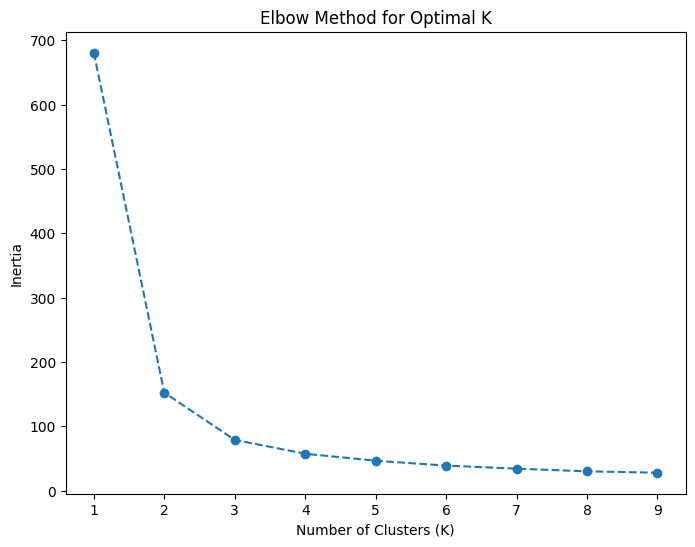

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil nilai yang akan digunakan untuk clustering
X = df[['sepal_length', 'sepal_width',	'petal_length', 'petal_width']]

# Menentukan jumlah cluster yang diinginkan (misalnya, max_k = 10)
max_k = 10

# Inisialisasi list untuk inertia values
inertia_values = []

# Menghitung inertia untuk setiap nilai K
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Menampilkan grafik Elbow Method
plt.figure(figsize=(8,6))
plt.plot(range(1, max_k), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


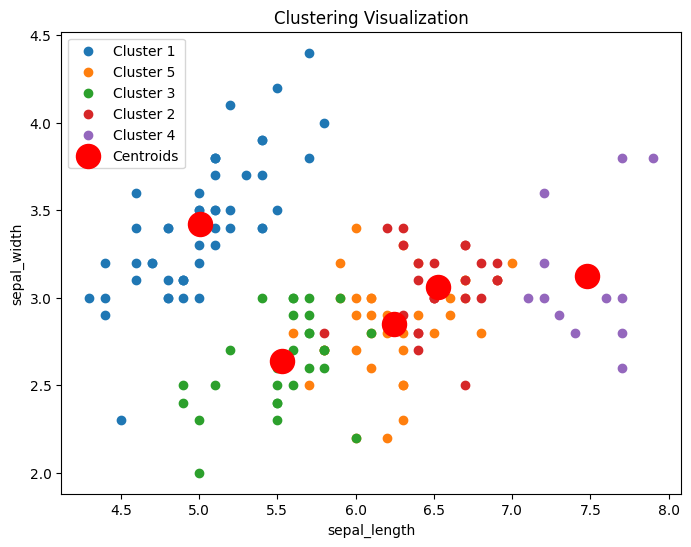

In [44]:
# Menentukan jumlah cluster yang diinginkan (berdasarkan hasil Elbow Method)
optimal_k = 5  # Misalnya, jumlah cluster optimal yang telah dipilih

# Melakukan clustering dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualisasi klaster
plt.figure(figsize=(8, 6))
for i in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == i]['sepal_length'],
                df[df['Cluster'] == i]['sepal_width'],
                label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


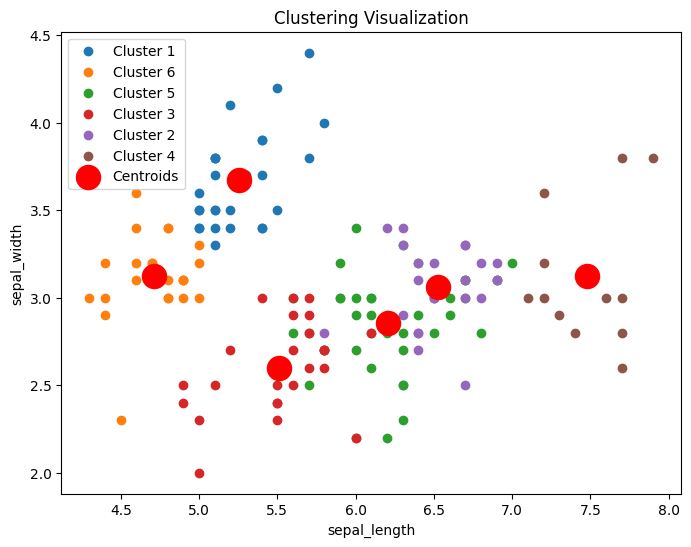

In [45]:
# Menentukan jumlah cluster yang diinginkan (berdasarkan hasil Elbow Method)
optimal_k = 6  # Misalnya, jumlah cluster optimal yang telah dipilih

# Melakukan clustering dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualisasi klaster
plt.figure(figsize=(8, 6))
for i in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == i]['sepal_length'],
                df[df['Cluster'] == i]['sepal_width'],
                label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

# Inisialisasi dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Menghitung Silhouette Score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)  # Perhatikan bahwa kami mengimpor silhouette_score
    silhouette_scores[k] = silhouette_avg

# Menampilkan nilai Silhouette Score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.6808136202936816
Silhouette Score for k=3: 0.5525919445499757
Silhouette Score for k=4: 0.4978256901095472
Silhouette Score for k=5: 0.49285559183161204
Silhouette Score for k=6: 0.36820569682713084
Silhouette Score for k=7: 0.3600597997328459
Silhouette Score for k=8: 0.3538815380353622
Silhouette Score for k=9: 0.33607614995770857
Silhouette Score for k=10: 0.33380799465469013


In [47]:
from sklearn.metrics import davies_bouldin_score

# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)  # Menghitung Davies-Bouldin Index
    dbi_scores[k] = dbi

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}: {dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.40483413639182975
Davies-Bouldin Index for k=3: 0.662322864989869
Davies-Bouldin Index for k=4: 0.78064003623761
Davies-Bouldin Index for k=5: 0.8196509367202403
Davies-Bouldin Index for k=6: 0.9096488534379631
Davies-Bouldin Index for k=7: 0.9676210311176733
Davies-Bouldin Index for k=8: 0.9345231499091669
Davies-Bouldin Index for k=9: 0.9641192031134219
Davies-Bouldin Index for k=10: 1.0014061009958641


In [48]:
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    ch_score = calinski_harabasz_score(X, labels)  # Menghitung Calinski-Harabasz Index
    calinski_harabasz_scores[k] = ch_score

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, ch_score in calinski_harabasz_scores.items():
    print(f"Calinski-Harabasz Index for k={k}: {ch_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 513.3038433517568
Calinski-Harabasz Index for k=3: 560.3999242466402
Calinski-Harabasz Index for k=4: 529.3982941434156
Calinski-Harabasz Index for k=5: 493.79768982240194
Calinski-Harabasz Index for k=6: 474.85419152314864
Calinski-Harabasz Index for k=7: 450.7495385397598
Calinski-Harabasz Index for k=8: 439.1031541731567
Calinski-Harabasz Index for k=9: 412.78520639303747
Calinski-Harabasz Index for k=10: 391.02151555778397


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
